<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
load=ctrl.Antecedent(np.arange(0,3,0.1),'load')
dirt=ctrl.Antecedent(np.arange(0,3,0.1),'dirt')
fabric=ctrl.Antecedent(np.arange(0,3,0.1),'fabric')
time=ctrl.Consequent(np.arange(0,3,0.1),'time')
water=ctrl.Consequent(np.arange(0,3,0.1),'water')
load['S']=fuzz.trimf(load.universe,[0,0,1])
load['M']=fuzz.trimf(load.universe,[0.5,1,1.5])
load['L']=fuzz.trimf(load.universe,[1,1.5,2])
dirt['L']=fuzz.trimf(dirt.universe,[0,0.5,1])
dirt['M']=fuzz.trimf(dirt.universe,[0.5,1,1.5])
dirt['H']=fuzz.trimf(dirt.universe,[1,1.5,2])
fabric['D']=fuzz.trimf(fabric.universe,[0,0,1])
fabric['N']=fuzz.trimf(fabric.universe,[0.5,1,1.5])
fabric['H']=fuzz.trimf(fabric.universe,[1.5,2,2])
time['S']=fuzz.trimf(time.universe,[0,0,1])
time['M']=fuzz.trimf(time.universe,[0.5,1,1.5])
time['L']=fuzz.trimf(time.universe,[1.5,2,2])
water['L']=fuzz.trimf(water.universe,[0,1,1.5])
water['M']=fuzz.trimf(water.universe,[1,1.5,2])
water['H']=fuzz.trimf(water.universe,[1.5,2,2])

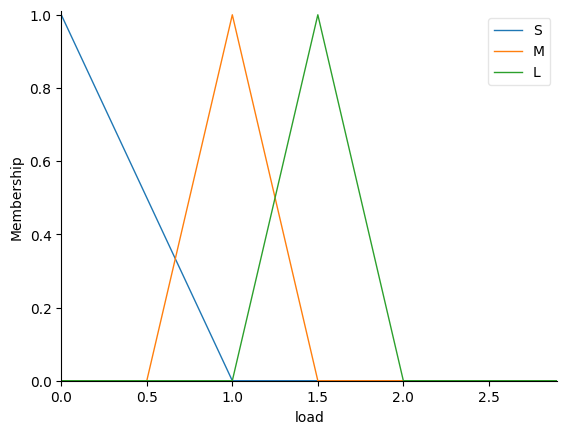

In [4]:
load.view()

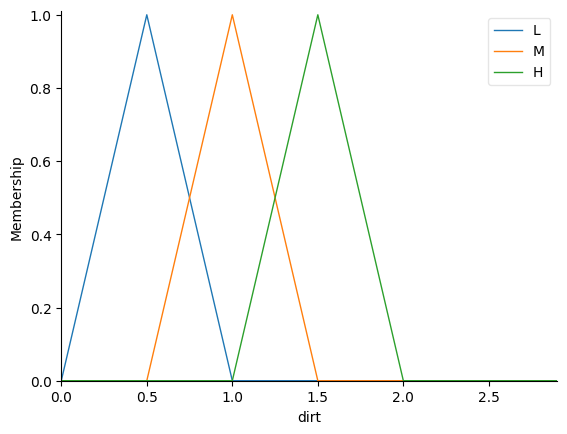

In [5]:
dirt.view()

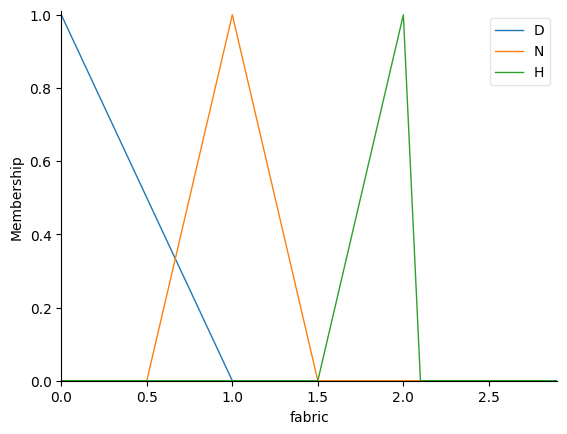

In [6]:
fabric.view()

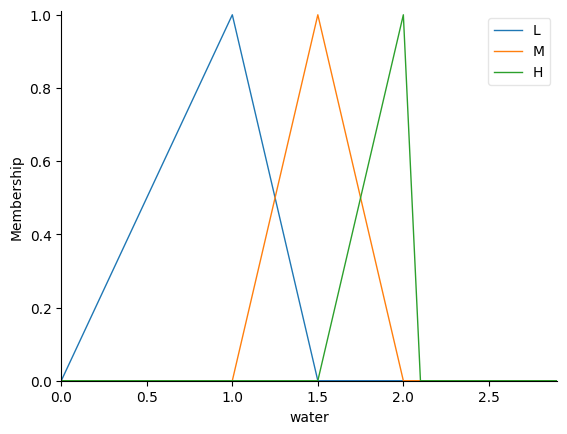

In [7]:
water.view()

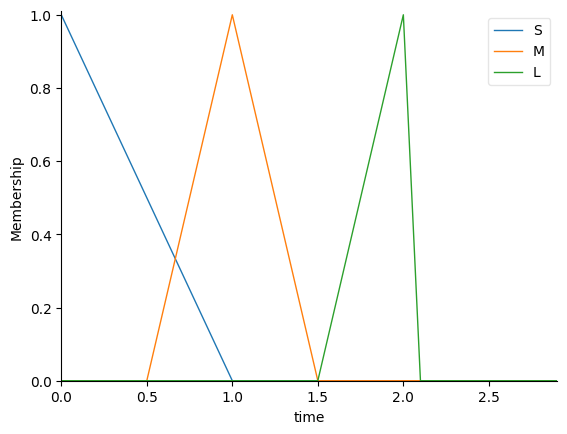

In [8]:
time.view()

In [9]:
#định nghĩa tập luật
rule1 = ctrl.Rule(load['S']&dirt['L'],(time['S'],water['L']))
rule2 = ctrl.Rule(load['S']&dirt['M'],(time['M'],water['M']))
rule3 = ctrl.Rule(load['S']&dirt['H'],(time['L'],water['M']))
rule4 = ctrl.Rule(load['M']&dirt['L'],(time['M'],water['M']))
rule5 = ctrl.Rule(load['M']&dirt['M'],(time['L'],water['M']))
rule6 = ctrl.Rule(load['M']&dirt['H'],(time['L'], water['H']))
rule7 = ctrl.Rule(load['L']&dirt['L'],(time['M'],water['H']))
rule8 = ctrl.Rule(load['L']&dirt['M'],(time['L'],water['H']))
rule9 = ctrl.Rule(load['L']&dirt['H'],(time['L'],water['H']))
#luật dựa trên loại vải
rule10 = ctrl.Rule((fabric['D']& fabric['N']), (time['S'], water['L']))
rule11 = ctrl.Rule(fabric['H'], (time['L'], water['M']))
#luật kết hợp
rule12 = ctrl.Rule(load['L'] & dirt['H'] & fabric['H'], (time['L'], water['H']))
rule13 = ctrl.Rule(load['S'] & dirt['L'] & fabric['D'], (time['S'], water['L']))
rule14 = ctrl.Rule(load['M'] & dirt['M'] & fabric['N'], (time['M'], water['M']))


1.0456790123456794
1.1166666666666665


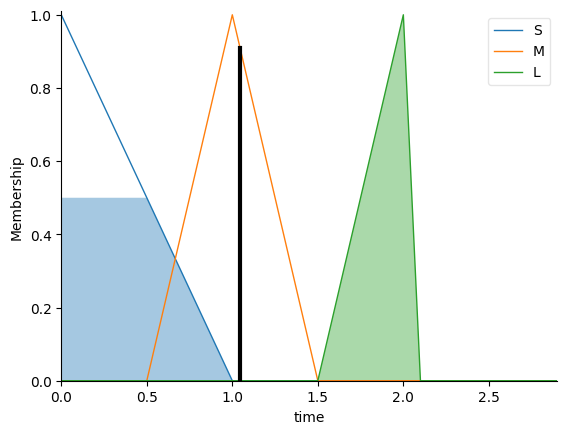

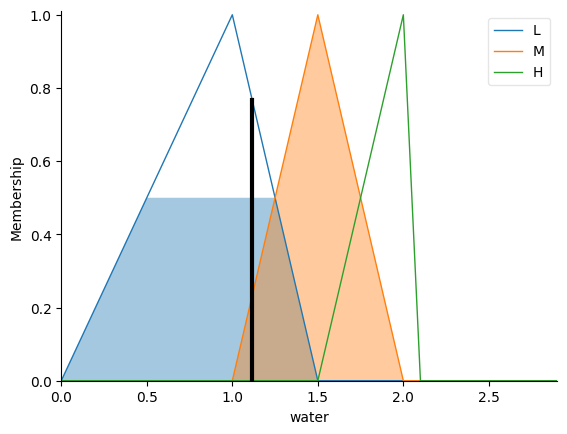

In [10]:
washing=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14])
sim=ctrl.ControlSystemSimulation(washing)
sim.input['load']=0.5
sim.input['dirt']=0.5
sim.input['fabric']=2
sim.compute()
print(sim.output['time'])
print(sim.output['water'])
time.view(sim)
water.view(sim)